In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data=pd.read_csv("Flipkart_Mobiles.csv")

In [3]:
data.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [4]:
data.isnull().sum()

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


### Categorical data visuliazation

In [6]:
categorical=data.select_dtypes("O")

In [7]:
categorical.columns

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage'], dtype='object')

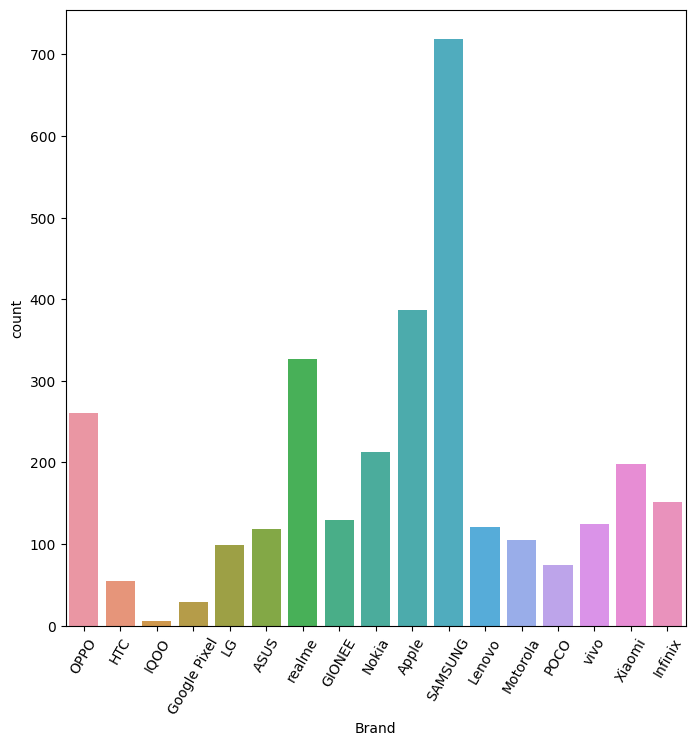

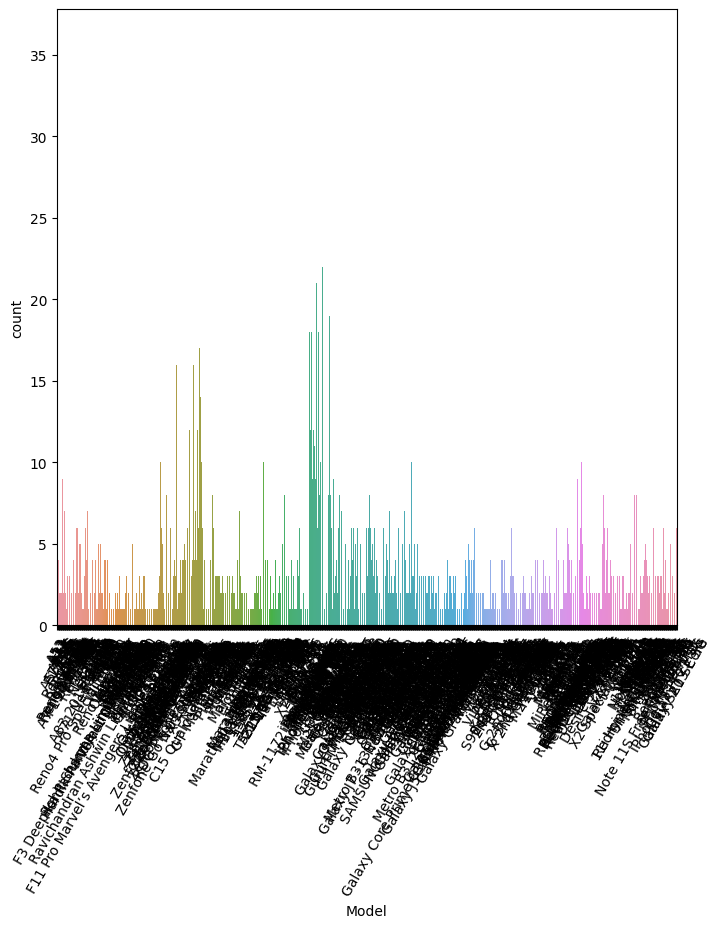

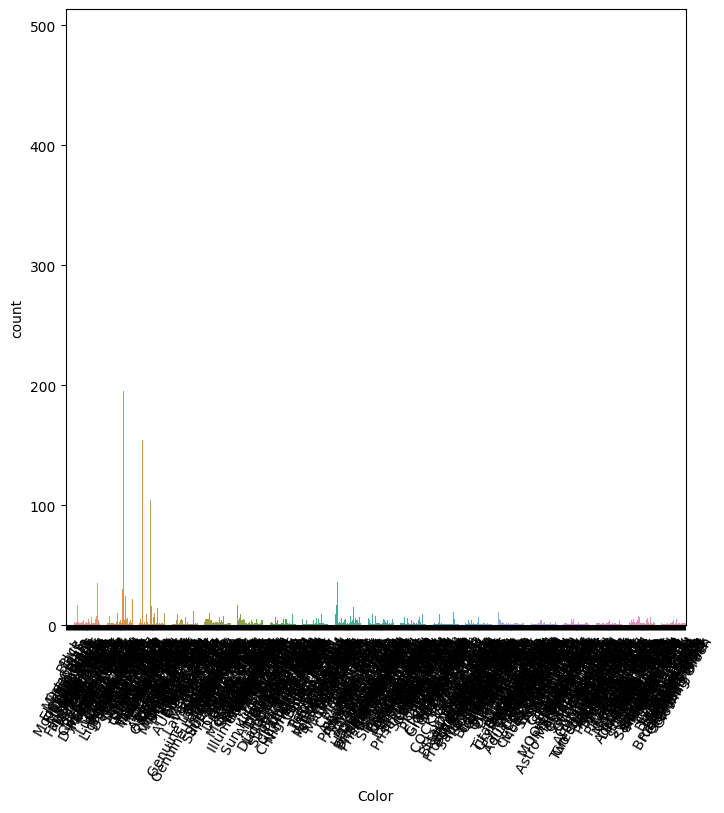

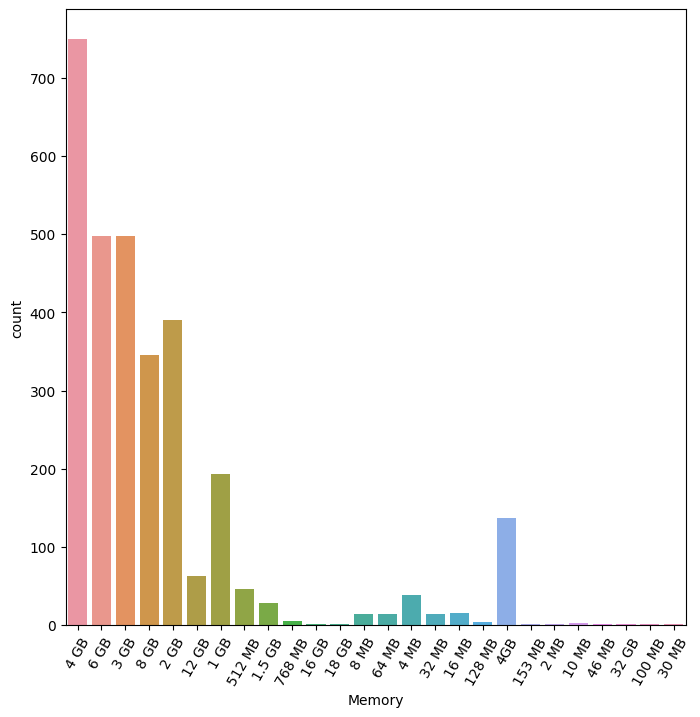

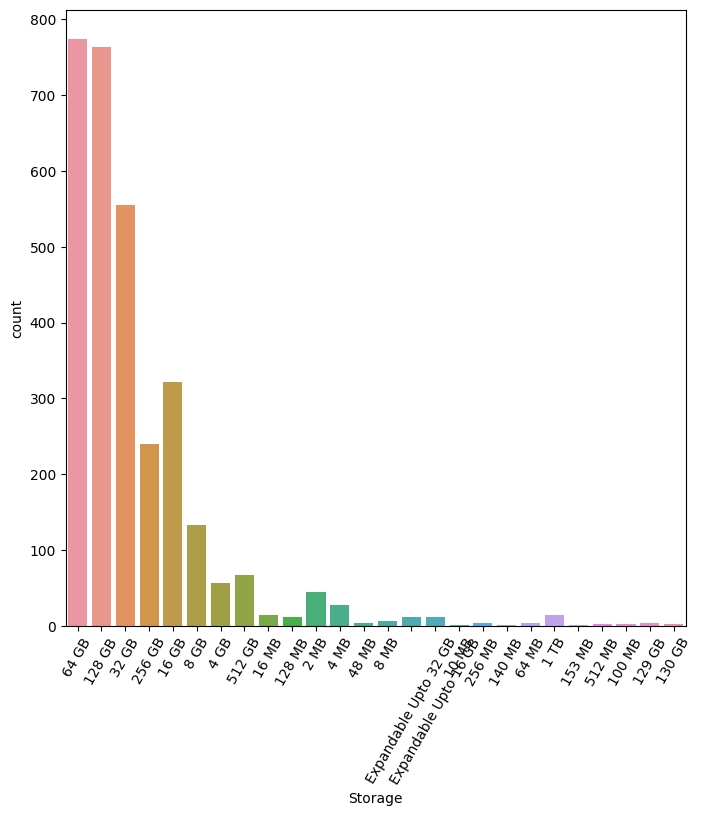

In [8]:
for i in categorical:
    plt.figure(figsize=(8,8));
    sns.countplot(x=i,data=categorical);
    plt.xticks(rotation=60);
    plt.show();

### numerical data visulization

In [9]:
numerical=data.select_dtypes("int")

In [10]:
numerical.columns

Index(['Selling Price', 'Original Price'], dtype='object')

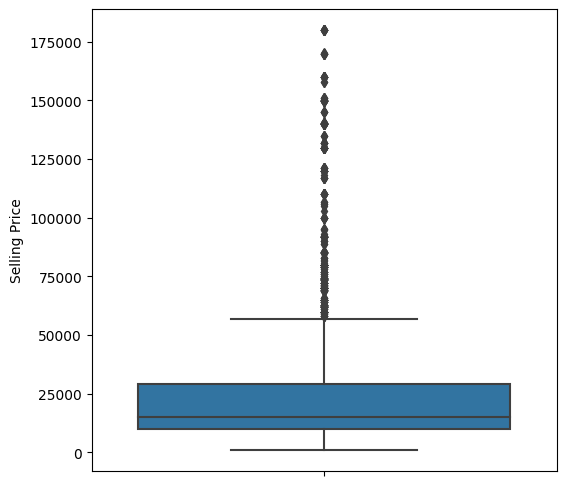

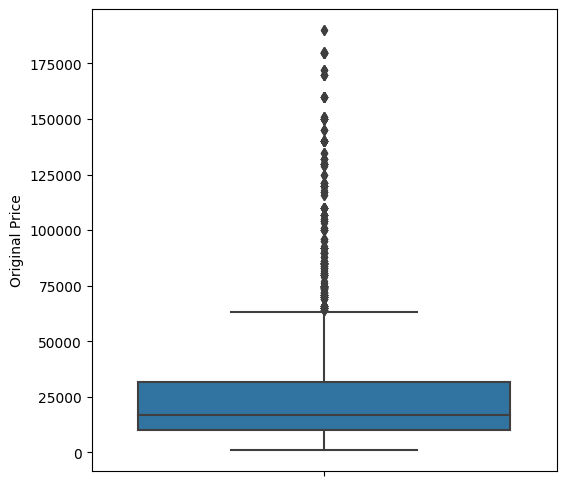

In [11]:
for i in numerical:
    plt.figure(figsize=(6,6));
    sns.boxplot(y=i,data=numerical)
    plt.xticks(rotation=60);
    plt.show();

### Bivariate data visulization

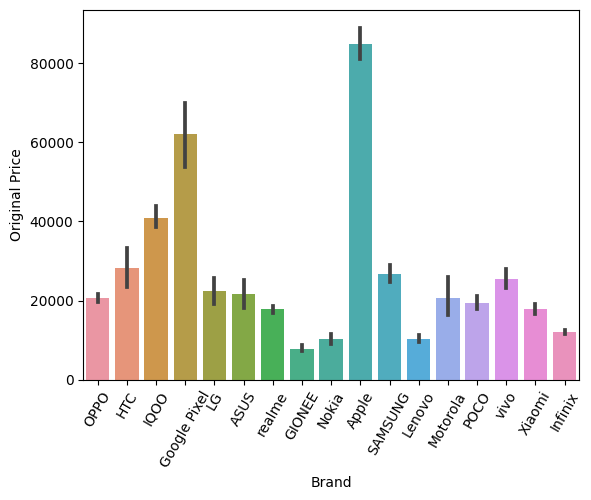

In [12]:
sns.barplot(x=data["Brand"],y=data["Original Price"]);
plt.xticks(rotation=60);

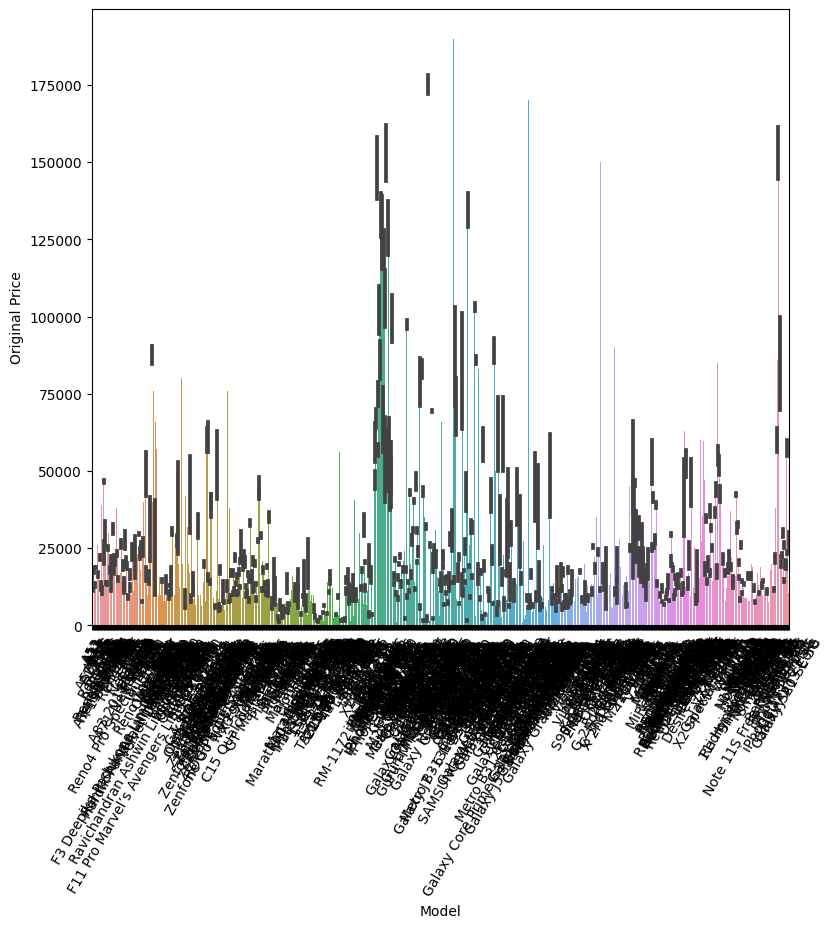

In [13]:
plt.figure(figsize=(9,8))
sns.barplot(x=data["Model"],y=data["Original Price"]);
plt.xticks(rotation=60);

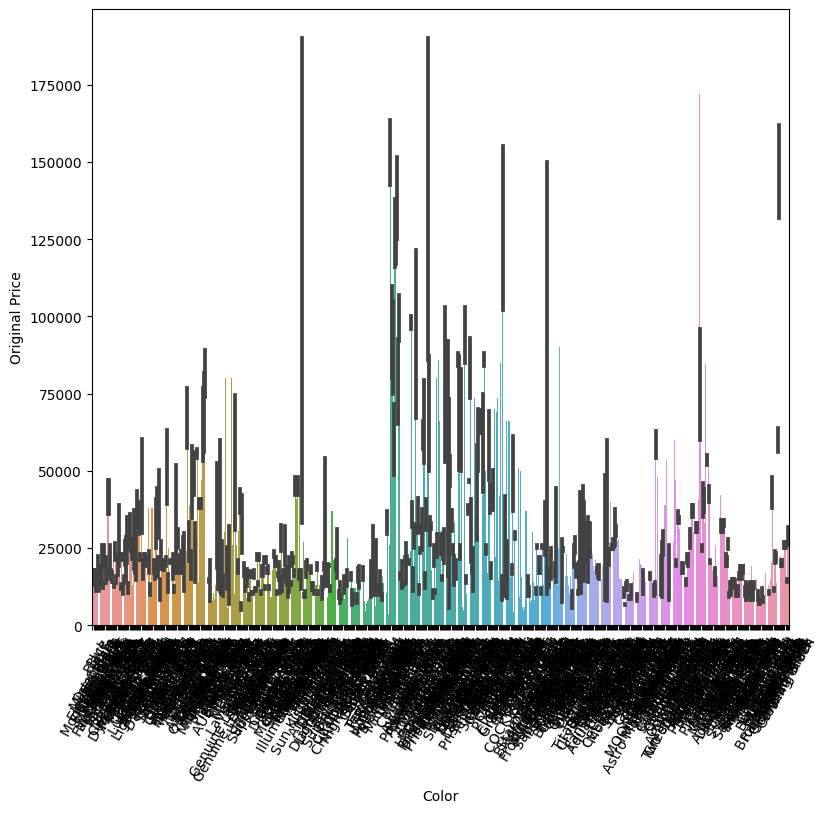

In [14]:
plt.figure(figsize=(9,8))
sns.barplot(x=data["Color"],y=data["Original Price"]);
plt.xticks(rotation=60);

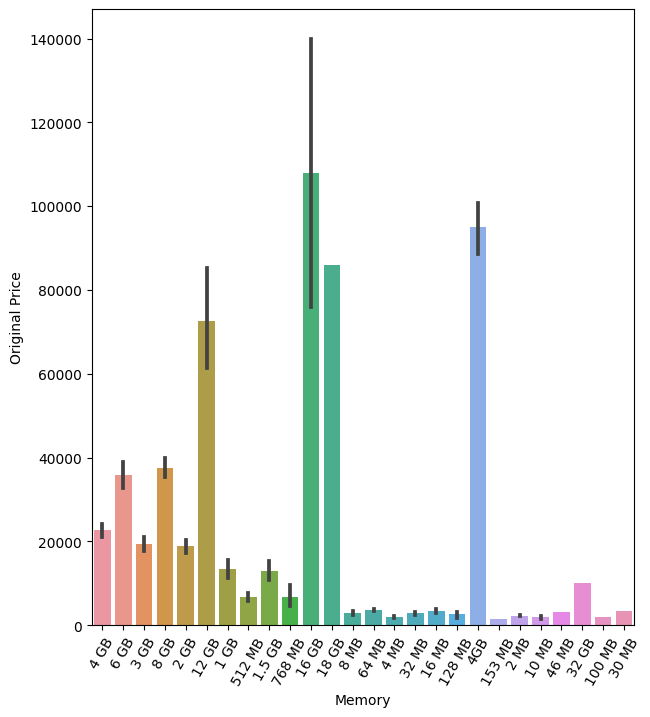

In [15]:
plt.figure(figsize=(7,8))
sns.barplot(x=data["Memory"],y=data["Original Price"]);
plt.xticks(rotation=60);

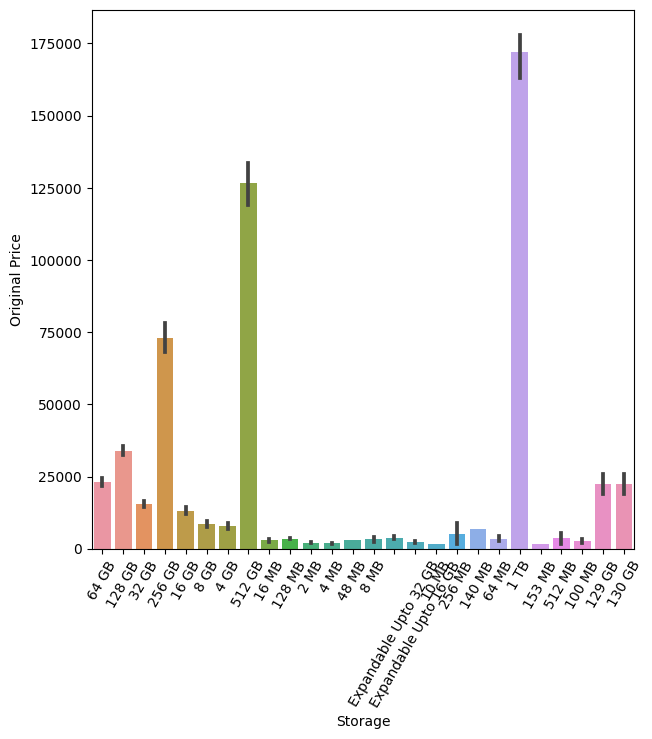

In [16]:
plt.figure(figsize=(7,7))
sns.barplot(x=data["Storage"],y=data["Original Price"]);
plt.xticks(rotation=60);

In [17]:
data["Rating"].unique()

array([4.5, 4.3, 4.4, 4.2, nan, 4. , 4.6, 3.8, 3. , 4.1, 3.7, 3.1, 4.7,
       3.9, 3.4, 3.3, 3.6, 3.5, 3.2, 2.7, 2.8, 5. , 2.4, 2.3, 4.9, 4.8])

In [18]:
data["Rating"].fillna(data["Rating"].mean(),inplace=True)

In [19]:
data.isnull().sum()

Brand              0
Model              0
Color              0
Memory            43
Storage           39
Rating             0
Selling Price      0
Original Price     0
dtype: int64

In [20]:
data["Brand"].unique()

array(['OPPO', 'HTC', 'IQOO', 'Google Pixel', 'LG', 'ASUS', 'realme',
       'GIONEE', 'Nokia', 'Apple', 'SAMSUNG', 'Lenovo', 'Motorola',
       'POCO', 'vivo', 'Xiaomi', 'Infinix'], dtype=object)

In [21]:
data["Model"].unique()

array(['A53', 'A12', 'A53s 5G', 'A33', 'A31', 'A74 5G', 'A11K', 'F17 Pro',
       'A54', 'Reno6 5G', 'F17', 'A16', 'Reno5 Pro 5G', 'A15',
       'A74 5G BLACK', 'Reno6 Pro 5G', 'Reno2 F', 'Reno3 Pro', 'A15s',
       'A15S', 'F19 Pro', 'F19 Pro+ 5G', 'F19', 'A7', 'F5', 'A5s', 'Reno',
       'Reno2 Z', 'F15', 'K1', 'A9 2020', 'Find X',
       'Reno4 Pro Special Edition', 'F11', 'A5', 'Reno4 Pro', 'A5 2020',
       'F3 Deepika Padukone Limited Edition', 'F1 Plus',
       'A83 2018 Edition', 'F3', 'A3s', 'A83', 'K3', 'F9', 'A52',
       'A71 New Edition', 'Neo 7 4G', 'A71', 'A57', 'A1K', 'A37f',
       'F9 Pro', 'F19s', 'A71k', 'A9', 'F3 Plus',
       'Rohit Sharma Limited Edition', 'F17 PRO',
       'Hardik Pandya Limited Editon',
       'Ravichandran Ashwin Limited Edition', 'F11 Pro', 'R1 R829',
       'F5 Youth', 'F7', 'Neo 5', 'F1', 'Reno2', 'R17',
       'F11 Pro Marvel’s Avengers Limited Edition', 'Reno 10x Zoom',
       'F1S', 'N5111', 'U11+ ', 'Wildfire X ', '3', '4a ', '3a XL ',


In [22]:
data.drop("Model",axis=1,inplace=True)

In [23]:
data.columns

Index(['Brand', 'Color', 'Memory', 'Storage', 'Rating', 'Selling Price',
       'Original Price'],
      dtype='object')

In [24]:
data["Color"].unique()

array(['Moonlight Black', 'Mint Cream', 'Electric Black', 'Deep Blue',
       'Black', 'Blue', 'Flowing Silver', 'Crystal Blue', 'Ink Black',
       'Lake Green', 'Mystery Black', 'Fantastic Purple', 'Matte Black',
       'Moonlight Gold', 'Aurora', 'Stellar Black', 'Magic Blue',
       'Starry Blue', 'Crystal Black', 'Metallic White', 'Fantasy White',
       'Navy Blue', 'Fancy Blue', 'Pearl Blue', 'Astral Blue',
       'CRYSTAL BLACK', 'Dynamic Black', 'Dynamic Orange', 'Mystery Blue',
       'Fairy White', 'Fluid Black', 'Sky White', 'Midnight Black',
       'Rainbow Silver', 'Auroral Blue', 'Crystal Silver', 'Space Silver',
       'Fancy White', 'Midnight Blue', 'Glaring Gold', 'Starry Black',
       'Red', 'JET BLACK', 'Luminous Black', 'Unicorn White',
       'Prism Black', 'Piano Black', 'Classic Silver', 'Lightening Black',
       'Marine Green', 'Bordeaux Red', 'Galactic Blue', 'Marble Green',
       'Diamond Blue', 'Silky White', 'Starry Night', 'Space Purple',
       'Dazzli

In [25]:
data["Color"].nunique()

639

In [26]:
data['colour'] = data["Color"].apply(lambda x: x.lower().split(" ")[-1])

In [27]:
data["colour"].unique()

array(['black', 'cream', 'blue', 'silver', 'green', 'purple', 'gold',
       'aurora', 'white', 'orange', 'red', 'night', 'champagne', 'mint',
       'grey', 'mb', 'pink', 'gray', 'platinum', 'titan', 'brown', 'ice',
       'sky', 'carbon', 'violet', 'yellow', 'titanium', 'nebula',
       'leather', 'ninja', 'knight', 'sapphire', 'ruby', 'brick',
       'concrete', 'garlic', 'onion', 'fjord', 'sand', 'dusk', 'charcoal',
       'copper', 'copper/black', 'black&blue', 'baltic', 'iron', 'steel',
       'cyan', 'starlight', 'midnight', 'coral', 'graphite', 'navy',
       'bronze', 'pearl', 'glow', 'frost', 'onyx', 'lavender', 'sprite',
       'grey/black', 'teal', 'emerald', 'gradient', 'sangria',
       'cranberry', 'sage', 'dream', 'flare', 'magic', 'symphony', 'jazz',
       'melody', 'dazzle', 'rainbow', 'sunrise', 'seablue', 'birch',
       'lagoon', 'sepia', '', 'edition', 'greener', 'aqua', 'spark',
       'dawn', 'mist', 'wave', 'snow', 'secret', 'ocean', 'diamond',
       'jade', 

In [28]:
data["colour"].nunique()

95

In [29]:
data["Memory"].unique()

array(['4 GB', '6 GB', '3 GB', '8 GB', '2 GB', '12 GB', '1 GB', '512 MB',
       '1.5 GB', '768 MB', '16 GB', '18 GB', '8 MB', '64 MB', '4 MB',
       '32 MB', '16 MB', '128 MB', nan, '4GB', '153 MB', '2 MB', '10 MB',
       '46 MB', '32 GB', '100 MB', '30 MB'], dtype=object)

In [30]:
data["Memory"].fillna(data["Memory"].mode,inplace=True)

In [31]:
data["Memory"]=data["Memory"].apply(lambda x: int(re.findall("\d+",str(x))[0]))

In [32]:
data["Memory"].unique()

array([  4,   6,   3,   8,   2,  12,   1, 512, 768,  16,  18,  64,  32,
       128,   0, 153,  10,  46, 100,  30], dtype=int64)

In [33]:
data["Storage"].unique()

array(['64 GB', '128 GB', '32 GB', '256 GB', '16 GB', '8 GB', '4 GB',
       '512 GB', nan, '16 MB', '128 MB', '2 MB', '4 MB', '48 MB', '8 MB',
       'Expandable Upto 32 GB', 'Expandable Upto 16 GB', '10 MB',
       '256 MB', '140 MB', '64 MB', '1 TB', '153 MB', '512 MB', '100 MB',
       '129 GB', '130 GB'], dtype=object)

In [34]:
data["Storage"].fillna(data["Storage"].mode,inplace=True)

In [35]:
data["Storage"]=data["Storage"].apply(lambda x:int(re.findall("\d+",str(x))[0]))

In [36]:
data["Storage"].unique()

array([ 64, 128,  32, 256,  16,   8,   4, 512,   0,   2,  48,  10, 140,
         1, 153, 100, 129, 130], dtype=int64)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Color           3114 non-null   object 
 2   Memory          3114 non-null   int64  
 3   Storage         3114 non-null   int64  
 4   Rating          3114 non-null   float64
 5   Selling Price   3114 non-null   int64  
 6   Original Price  3114 non-null   int64  
 7   colour          3114 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 194.8+ KB


In [38]:
data.drop("Color",axis=1,inplace=True)

In [39]:
data.columns

Index(['Brand', 'Memory', 'Storage', 'Rating', 'Selling Price',
       'Original Price', 'colour'],
      dtype='object')

In [40]:
data.drop("Selling Price",axis=1,inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Memory          3114 non-null   int64  
 2   Storage         3114 non-null   int64  
 3   Rating          3114 non-null   float64
 4   Original Price  3114 non-null   int64  
 5   colour          3114 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 146.1+ KB


In [42]:
data["Rating"].astype(float)

0       4.5
1       4.5
2       4.3
3       4.3
4       4.5
       ... 
3109    4.3
3110    4.3
3111    4.3
3112    4.2
3113    4.2
Name: Rating, Length: 3114, dtype: float64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Memory          3114 non-null   int64  
 2   Storage         3114 non-null   int64  
 3   Rating          3114 non-null   float64
 4   Original Price  3114 non-null   int64  
 5   colour          3114 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 146.1+ KB


### apply one hot encoding to Brand and colour

In [44]:
data=pd.get_dummies(data,drop_first=True)

In [45]:
data.shape

(3114, 114)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Columns: 114 entries, Memory to colour_yellow
dtypes: float64(1), int64(3), uint8(110)
memory usage: 431.9 KB


In [47]:
data.head()

,Memory,Storage,Rating,Original Price,Brand_Apple,Brand_GIONEE,Brand_Google Pixel,Brand_HTC,Brand_IQOO,Brand_Infinix,...,colour_steel,colour_sunrise,colour_symphony,colour_teal,colour_titan,colour_titanium,colour_violet,colour_wave,colour_white,colour_yellow
0,4,64,4.5,15990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,64,4.5,15990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,128,4.3,17990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,128,4.3,17990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,64,4.5,15990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
x=data.drop(columns=["Original Price"],axis=1)
y=data["Original Price"]

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [51]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [53]:
model=LinearRegression()

In [54]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [55]:
train_pred=model.predict(x_train_scaled)
test_pred=model.predict(x_test_scaled)
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
r2_train = r2_score(y_train,train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test,test_pred))
r2_test= r2_score(y_test,test_pred)
print('Train Performance')
print(f'RMSE : {rmse_train}')
print(f'R2 : {r2_train}')
print('Test Performance')
print(f'RMSE : {rmse_test}')
print(f'R2 : {r2_test}')

Train Performance
RMSE : 16757.078186258936
R2 : 0.7181622548541959
Test Performance
RMSE : 5984537067557267.0
R2 : -3.6478653342452686e+22


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rd=RandomForestRegressor()

In [58]:
rd.fit(x_train_scaled,y_train)
dt_train_predt=rd.predict(x_train_scaled)
dt_test_pred=rd.predict(x_test_scaled)

In [59]:
rmse_train = np.sqrt(mean_squared_error(y_train,dt_train_predt))
r2_train = r2_score(y_train,dt_train_predt)
rmse_test = np.sqrt(mean_squared_error(y_test,dt_test_pred))
r2_test= r2_score(y_test,dt_test_pred)
print('Train Performance')
print(f'RMSE : {rmse_train}')
print(f'R2 : {r2_train}')
print('Test Performance')
print(f'RMSE : {rmse_test}')
print(f'R2 : {r2_test}')

Train Performance
RMSE : 5429.876438680044
R2 : 0.9704074454062424
Test Performance
RMSE : 11194.465777982956
R2 : 0.8723606979195727


In [60]:
import pickle

In [63]:
pickle.dump(rd, open('m_model.pkl', 'wb'))